<br>
<br>
<font size=10><b>Анализ продаж зернового кофе</b></font>
<br>
<br>
<br>
<img src='data/kofe_zerno.jpeg'></img>
<br>
<br>
Компания, занимающаяся оптовыми поставками зернового кофе, запросила отчёт о продажах по месяцам. Интересуют только те продажи, у которых не было доставки: <b>их количество в месяц, процент плохих отзывов, доходность таких транзакций – в разрезе на продажи с вводом клиентом  промокода и без</b>

## Эпизод 1 
---
### Import and Data load

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

import warnings
warnings.filterwarnings('ignore')

In [273]:
data = pd.read_csv('data/Транзакции.csv', encoding='cp1251', sep='\t', index_col='TransactionID')
data

,Date,Count,Cost,Доставка,Плохой отзыв,Paid,Weight,Promo,AutoIssue
TransactionID,,,,,,,,,
1,2020-Aug-21 8:53:03,67,6325,0,0,"2605,0",5481,0,0
2,2019-Sep-3 11:53:03,90,8307,1,1,"8553,0",5956,1,1
3,2019-Oct-15 4:31:02,59,9819,0,1,"9995,0",5170,1,0
4,2019-Aug-26 4:14:00,14,5351,1,1,"12603,0",8826,0,0
5,2020-Aug-27 1:21:03,14,7779,1,0,"5625,0",5357,0,0
...,...,...,...,...,...,...,...,...,...
14361,2019-Oct-30 4:42:01,70,4716,1,1,"3201,0",7509,1,1
14362,2019-Oct-8 23:23:03,14,4547,1,0,"10810,0",8511,1,0
14363,2020-Aug-17 18:25:00,8,9940,1,1,"10597,0",9649,0,1


## Эпизод 2
---
### Подстройка данных под задачу

Оставим продажи без доставки

In [274]:
data = data[data['Доставка'] == 0]
data

,Date,Count,Cost,Доставка,Плохой отзыв,Paid,Weight,Promo,AutoIssue
TransactionID,,,,,,,,,
1,2020-Aug-21 8:53:03,67,6325,0,0,"2605,0",5481,0,0
3,2019-Oct-15 4:31:02,59,9819,0,1,"9995,0",5170,1,0
8,2020-Aug-23 13:34:03,45,6381,0,0,"6251,0",9227,0,0
9,2020-Aug-31 16:57:02,31,8795,0,1,"2047,0",6044,0,1
10,2020-Aug-29 9:18:01,41,4175,0,1,"6300,0",7866,1,1
...,...,...,...,...,...,...,...,...,...
14355,2019-Dec-2 15:52:01,36,6704,0,0,"8613,0",7665,0,0
14357,2020-Aug-26 8:30:05,68,6042,0,1,"10181,0",5656,1,1
14359,2020-Aug-27 15:22:02,67,5211,0,0,"3873,0",4345,1,1


Из колонки Date уберем время и число

In [275]:
data.Date = [date.split()[0] for date in data.Date.values] # убираем время
data.Date = ['-'.join(date.split('-')[:-1]) for date in data.Date.values] # убираем число

In [276]:
data

,Date,Count,Cost,Доставка,Плохой отзыв,Paid,Weight,Promo,AutoIssue
TransactionID,,,,,,,,,
1,2020-Aug,67,6325,0,0,"2605,0",5481,0,0
3,2019-Oct,59,9819,0,1,"9995,0",5170,1,0
8,2020-Aug,45,6381,0,0,"6251,0",9227,0,0
9,2020-Aug,31,8795,0,1,"2047,0",6044,0,1
10,2020-Aug,41,4175,0,1,"6300,0",7866,1,1
...,...,...,...,...,...,...,...,...,...
14355,2019-Dec,36,6704,0,0,"8613,0",7665,0,0
14357,2020-Aug,68,6042,0,1,"10181,0",5656,1,1
14359,2020-Aug,67,5211,0,0,"3873,0",4345,1,1


## Эпизод 3
---
### Разведовочный анализ

Проверим данные на наличие пропусков

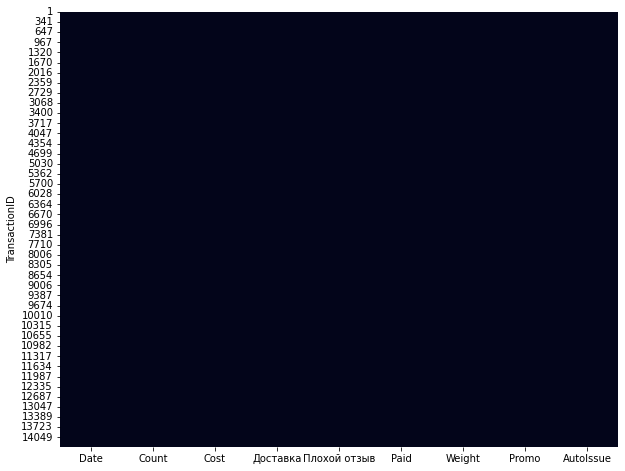


 Количество пропусков в каждом столбце: 


Date            0
Count           0
Cost            0
Доставка        0
Плохой отзыв    0
Paid            0
Weight          0
Promo           0
AutoIssue       0
dtype: int64

In [277]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

print('\n Количество пропусков в каждом столбце: ')
data.isnull().sum()

Heatmap и кол-во пропусков говорят о том, что пропусков нет

Пройдемся по значениям категориальных признаков

In [278]:
categorical_columns = [col for col in data
                       if data[col].dtypes == 'object']
for col in categorical_columns:
    print(f'{col} DESCRIPTION:')
    print(data[col].value_counts())
    print('\n')

Date DESCRIPTION:
2020-Mar    589
2019-Oct    510
2020-Aug    500
2020-Jul    473
2019-Nov    472
2019-Dec    437
2020-Jan    436
2019-Sep    425
2020-May    411
2020-Feb    407
2020-Jun    393
2019-May    366
2019-Jun    362
2020-Apr    355
2019-Jul    345
2019-Aug    330
2019-Apr    316
2019-Mar      1
Name: Date, dtype: int64


Paid DESCRIPTION:
456,0      4
14141,0    4
2123,0     4
13238,0    4
9860,0     4
          ..
14309,0    1
4452,0     1
283,0      1
9113,0     1
7200,0     1
Name: Paid, Length: 5645, dtype: int64




Видно, что в марте 2019 продажи не особо задались. <br><br>
И обнаружилась еще одна проблема в данных: <br>
Paid записан, как object и имеет числа вида: 456,0 нужно перевести в 456.0<br>

In [279]:
# Исправим Paid на float32
data.Paid = np.array([value.replace(',', '.') for value in data.Paid.values], dtype='float32')

In [280]:
data

,Date,Count,Cost,Доставка,Плохой отзыв,Paid,Weight,Promo,AutoIssue
TransactionID,,,,,,,,,
1,2020-Aug,67,6325,0,0,2605.0,5481,0,0
3,2019-Oct,59,9819,0,1,9995.0,5170,1,0
8,2020-Aug,45,6381,0,0,6251.0,9227,0,0
9,2020-Aug,31,8795,0,1,2047.0,6044,0,1
10,2020-Aug,41,4175,0,1,6300.0,7866,1,1
...,...,...,...,...,...,...,...,...,...
14355,2019-Dec,36,6704,0,0,8613.0,7665,0,0
14357,2020-Aug,68,6042,0,1,10181.0,5656,1,1
14359,2020-Aug,67,5211,0,0,3873.0,4345,1,1


In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7128 entries, 1 to 14364
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          7128 non-null   object 
 1   Count         7128 non-null   int64  
 2   Cost          7128 non-null   int64  
 3   Доставка      7128 non-null   int64  
 4   Плохой отзыв  7128 non-null   int64  
 5   Paid          7128 non-null   float32
 6   Weight        7128 non-null   int64  
 7   Promo         7128 non-null   int64  
 8   AutoIssue     7128 non-null   int64  
dtypes: float32(1), int64(7), object(1)
memory usage: 529.0+ KB


In [282]:
data.describe()

,Count,Cost,Доставка,Плохой отзыв,Paid,Weight,Promo,AutoIssue
count,7128.000000,7128.000000,7128.0,7128.000000,7128.000000,7128.000000,7128.000000,7128.000000
mean,50.454125,6982.046156,0.0,0.499719,7514.345703,7028.022306,0.496493,0.490600
std,28.568403,1717.573313,0.0,0.500035,4342.496094,1722.224032,0.500023,0.499947
min,1.000000,4000.000000,0.0,0.000000,0.000000,4000.000000,0.000000,0.000000
25%,26.000000,5504.750000,0.0,0.000000,3696.000000,5558.750000,0.000000,0.000000
50%,50.000000,6977.500000,0.0,0.000000,7507.000000,7053.500000,0.000000,0.000000
75%,75.000000,8462.000000,0.0,1.000000,11286.250000,8511.000000,1.000000,1.000000
max,100.000000,9998.000000,0.0,1.000000,15000.000000,9999.000000,1.000000,1.000000


## Эпизод 4
---
### Анализ данных

In [283]:
data

,Date,Count,Cost,Доставка,Плохой отзыв,Paid,Weight,Promo,AutoIssue
TransactionID,,,,,,,,,
1,2020-Aug,67,6325,0,0,2605.0,5481,0,0
3,2019-Oct,59,9819,0,1,9995.0,5170,1,0
8,2020-Aug,45,6381,0,0,6251.0,9227,0,0
9,2020-Aug,31,8795,0,1,2047.0,6044,0,1
10,2020-Aug,41,4175,0,1,6300.0,7866,1,1
...,...,...,...,...,...,...,...,...,...
14355,2019-Dec,36,6704,0,0,8613.0,7665,0,0
14357,2020-Aug,68,6042,0,1,10181.0,5656,1,1
14359,2020-Aug,67,5211,0,0,3873.0,4345,1,1


In [284]:
def count_transactions(data: pd.DataFrame, date: str, promo: bool) -> pd.DataFrame:
    """ Функция считает:
    Введен ли Промокод, Кол-во транзакций, %Плохих отзывов, %Доходность
    для определенной даты.
    data: полный набор данных(без доставки).
    date: дата -  год-месяц, например 2020-Aug.
    promo: с промокодом или без: True, False.
    return: возращает датафрейм из одной строки со всей информацией
            для определенной даты.
    """
    promo = int(promo) 
    
    transactions = data[data.Date == date] # Берем строки с определенной датой
    transactions = transactions[transactions.Promo == promo] # указываем будет ли промокод
    sum_transactions = transactions.Count.sum() # Кол-во транзакций
    date_transactions = date # Дата
    promo_transactions = bool(promo) # Промокод
    bad_review = transactions['Плохой отзыв']
    bad_review = (bad_review == 1).sum() # Сколько плохих отзывов
    all_review = transactions['Плохой отзыв']
    all_review = all_review.shape[0] # Сколько всего отзывов
    bad_review_percent = bad_review / all_review
    bad_review_percent = round(bad_review_percent, 3) * 100 # Процент плохих отзывов
    ots = transactions.Paid.sum() # Оплаченная по транзакциям сумма
    zcpz = transactions.Cost.sum() # Закупочная цена поставленных зерен
    profit = (ots - zcpz) / zcpz * 100 
    profit = round(profit, 2) # Доходность
    data_report = [[date_transactions, promo_transactions, sum_transactions, bad_review_percent, profit]]
    data_report = pd.DataFrame(data_report, columns=['Месяц', 'Введен промокод', 
                                                     "Кол-во транзакций", 'Плохих отзывов,%', 
                                                     'Доходность,%'])
    return data_report

Создадим пустой датафрейм с нужными колонками и будем заполнять его с помощью цикла

In [285]:
report = pd.DataFrame([], columns=['Месяц', 'Введен промокод', 
                                                     "Кол-во транзакций", 'Плохих отзывов,%', 
                                                     'Доходность,%'])
for date in np.unique(data.Date):
    transaction_without_promo = count_transactions(data=data, date=date, promo=False)
    transaction_with_promo = count_transactions(data=data, date=date, promo=True)
    report = pd.concat([report, transaction_without_promo, transaction_with_promo], ignore_index=True)

Проверяем результат

In [286]:
report

,Месяц,Введен промокод,Кол-во транзакций,"Плохих отзывов,%","Доходность,%"
0,2019-Apr,False,8932,49.7,7.8
1,2019-Apr,True,7115,46.0,6.45
2,2019-Aug,False,9756,44.8,5.6
3,2019-Aug,True,7508,57.1,9.26
4,2019-Dec,False,11602,50.2,8.25
5,2019-Dec,True,10850,56.1,5.35
6,2019-Jul,False,8622,42.8,8.17
7,2019-Jul,True,10198,55.4,7.0
8,2019-Jun,False,9197,48.6,5.43
9,2019-Jun,True,9239,47.0,15.41


11-ый индекс говорит о том, что в 2019 году в Марте продаж с промокодом не было

In [287]:

writer = pd.ExcelWriter('report.xlsx')
report.to_excel(writer, 'marks')
writer.save()
print('DataFrame is written successfully to Excel Sheet.')

DataFrame is written successfully to Excel Sheet.


<br>
<font size=6>Вывод:</font>
<br>
<br>
<b>Процент плохих отзывов</b> довольно большой <b>в среднем 51%<b><br>Поэтому компании нужно менять подход к клиентам. <br><br>
Рекомендации:<ul>
    <li>Создать систему лояльности для клиентов(скидки, бонусы), использовать не только промокод</li>
    <li>Провести анализ обратной связи от клиентов, которые уже сделали заказ, чтобы узнать свои сильные и слабые стороны</li>
</ul>
<br>
<b>Доходность</b> почти всегда выходит в плюс, <br>но её процент можно повысить хорошими отзывами.
<br>Если клиенты будут довольны поставками, то со временем заказов станет больше и прибыль возрастет
<br>